<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Ajuste de curvas </font> </center>




<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting


## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Encontrar beta_0 y beta_1 resolviendo el sistema


In [3]:
# beta = A^-1 * b
A = np.array([[1,0],
              [1,1]])
b = np.array([1,0])

In [4]:
beta = np.linalg.inv(A)@b
beta

array([ 1., -1.])

$$ y=1  -x $$

In [5]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be squa

In [6]:
beta = np.linalg.solve(A,b)
beta

array([ 1., -1.])

In [7]:
P1 =(0,1)
P2=(1,0)

In [8]:
P1[0],P1[1]

(0, 1)

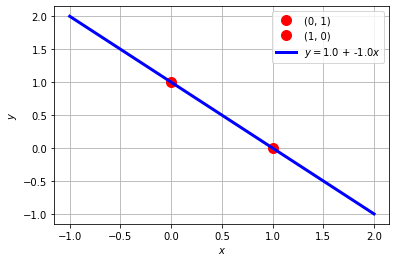

In [9]:
# Graficar la recta encontrada junto con los puntos
plt.figure(figsize=(6,4))

plt.plot(P1[0],P1[1], 'ro', ms=10, label= f'{P1}')
plt.plot(P2[0],P2[1], 'ro', ms=10, label= f'{P2}')
x_num = np.linspace(-1,2)
y_num = beta[0] + beta[1]*x_num # y= beta0 + beta1x
plt.plot(x_num,y_num, 'b', lw=3, label=f'$y=${np.round(beta[0],2)} + {np.round(beta[1],2)}$x$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [10]:
# Encontrar beta_0, beta_1 y beta_2
A = np.array([[1,-1,1],
              [1,0,0],
              [1,1,1]])
b = np.array([1,0,1])

In [11]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be squa

In [12]:
beta = np.linalg.solve(A,b)
beta

array([0., 0., 1.])

In [13]:
#Método de solucion de ecuaciones (como entrada se necesitan matrices y vectores)
beta = np.linalg.inv(A)@b
beta

array([0., 0., 1.])

In [14]:
P1=(-1,1)
P2=(0,0)
P3=(1,1)

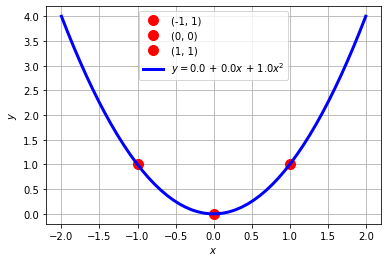

In [15]:
# Graficar la parabola junto con los puntos
plt.figure(figsize=(6,4))

plt.plot(P1[0],P1[1], 'ro', ms=10, label= f'{P1}')
plt.plot(P2[0],P2[1], 'ro', ms=10, label= f'{P2}')
plt.plot(P3[0],P3[1], 'ro', ms=10, label= f'{P3}')

x_num = np.linspace(-2,2)
y_num = beta[0] + beta[1]*x_num + beta[2]*x_num**2 # y= beta0 + beta1x + beta2x^2

plt.plot(x_num,y_num, 'b', lw=3, label=f'$y=${np.round(beta[0],2)} + {np.round(beta[1],2)}$x$ + {np.round(beta[2],2)}$x^2$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [16]:
# Crear un conjunto de puntos ruidosos a partir de una recta
N=100
x=np.linspace(0,10,N)
y = 10 + 2*x + np.random.normal(loc=0,scale=2, size=(N,))


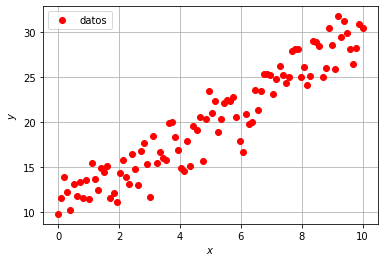

In [17]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'or', label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [18]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [19]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [20]:
# Definir funcion objetivo y punto inicial
def min_sqe(beta, x_points,y_points):
    n=len(x_points)
    #modelo matemático f_hat = beta0 + beta1*x
    f_hat = beta[0]+ beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [21]:
beta_ini = [0,0]

In [22]:
solucion = opt.minimize(fun=min_sqe, x0=beta_ini, args=(x,y))
solucion

      fun: 1.8739818754019681
 hess_inv: array([[ 3.93920575, -0.58737244],
       [-0.58737244,  0.11700454]])
      jac: array([-5.96046448e-08, -2.53319740e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([10.29155583,  1.95882388])

In [23]:
beta = solucion.x
beta

array([10.29155583,  1.95882388])

$$\hat{f(x)}=9.94 + 1.982*x$$

¿Qué tan bien luce el ajuste?

In [24]:
# Coeficientes \beta_0 y \beta_1
beta[0], beta[1]

(10.291555830845612, 1.9588238844795491)

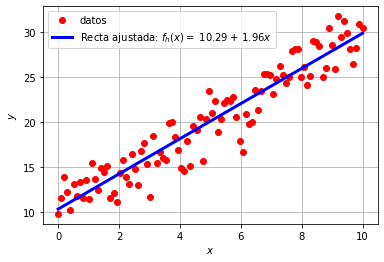

In [25]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'or', label='datos')

f_hat = beta[0] + beta[1]*x
plt.plot(x,f_hat,'b',lw=3,label=f'Recta ajustada: $f_h(x)=$ {np.round(beta[0],2)} + {np.round(beta[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Note que la pendiente es aproximadamente $2$ y el intercepto es aproximadamente $10$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [50]:
# Generamos 100 puntos ruidosos a partir de una senoidal
N=100
x = np.linspace(0,1,N)
y = np.sin(2*np.pi*x) + np.random.normal(loc=0,scale=0.3,size=(N,))


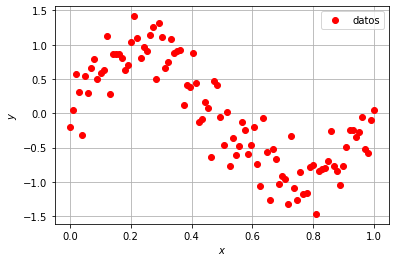

In [51]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'or',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.1. ¿Se ajustará bien una recta?

In [56]:
# Definir funcion objetivo y semilla
def min_sqe_1(beta,x_points,y_points):
    n= len(x_points)
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [57]:
# Resolver
beta_ini_1 = [0,0]

In [58]:
sol1 = opt.minimize(fun = min_sqe_1, x0 = beta_ini_1, args = (x,y))
sol1

      fun: 0.12851557517095819
 hess_inv: array([[ 3.87664629, -5.83905039],
       [-5.83905039, 11.73463819]])
      jac: array([2.29664147e-06, 9.59262252e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 0.90987873, -1.86395606])

In [59]:
beta1 = sol1.x
beta1 

array([ 0.90987873, -1.86395606])

**Veamos $\beta$ para el ajuste con recta**

In [60]:
beta1[0], beta1[1]

(0.9098787317041171, -1.8639560641004556)

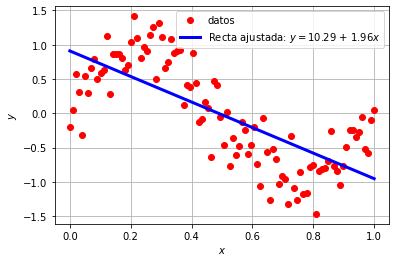

In [61]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'or',label='datos')

f_hat_1 = beta1[0] + beta1[1]*x

plt.plot(x,f_hat_1, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta[0],2)} + {np.round(beta[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [62]:
# Definir funcion objetivo y semilla
def min_sqe_2(beta,x_points,y_points):
    n=len(x_points)
    #Modelo polinomial de grado 2: f_hat = beta0 + beta1*x + beta2*x^2
    f_hat = beta[0] + beta[1]*x_points + beta[2]*x_points**2
    #Función de costo (objetivo)
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe

In [63]:
# Resolver
beta_ini_2 = [0,0,0]

In [64]:
sol2 = opt.minimize(fun=min_sqe_2, x0 = beta_ini_2, args= (x,y))
sol2

      fun: 0.12825420529234077
 hess_inv: array([[   8.4821052 ,  -34.28592838,   28.67835885],
       [ -34.28592838,  184.57596149, -173.15310619],
       [  28.67835885, -173.15310619,  172.87157577]])
      jac: array([-8.84756446e-07, -6.14672899e-07, -4.73111868e-07])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 16
     njev: 18
   status: 0
  success: True
        x: array([ 0.9594886 , -2.16467226,  0.30071638])

In [65]:
beta_2 = sol2.x
beta_2

array([ 0.9594886 , -2.16467226,  0.30071638])

**Veamos $\beta$ para el ajuste con parábola**

In [66]:
# Mostrar coeficientes
beta_2

array([ 0.9594886 , -2.16467226,  0.30071638])

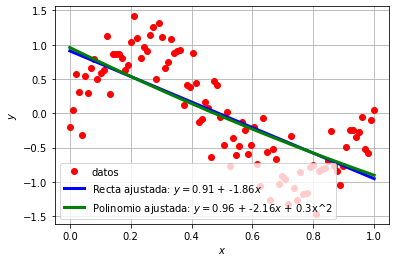

In [69]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(6,4))
plt.plot(x,y,'or',label='datos')

#Modelo lineal
f_hat_1 = beta1[0] + beta1[1]*x
#Modelo polinomial grado 2
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2

plt.plot(x,f_hat_1, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta1[0],2)} + {np.round(beta1[1],2)}$x$')
plt.plot(x,f_hat_2, 'g', lw=3, label=f'Polinomio ajustada: $y=${np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$ + {np.round(beta_2[2],2)}$x^2$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.3. Tampoco. Quizá un polinomio cúbico...

In [70]:
# Definir funcion objetivo y semilla
def min_sqe_3(beta,x_points,y_points):
    n=len(x_points)
    #Polinomio cúbico: f_hat = b0 + beta1*x + beta2*x^2 + beta3*x^3
    f_hat = beta[0] + beta[1]*x_points + beta[2]*x_points**2 + beta[3]*x_points**3
    
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe


In [71]:
beta_ini_3 = [0,0,0,0]

In [72]:
sol3 = opt.minimize(fun=min_sqe_3, x0=beta_ini_3, args=(x,y))
sol3

      fun: 0.042015586312425496
 hess_inv: array([[   14.37088917,  -108.07993996,   216.31617687,  -126.14082127],
       [ -108.07993996,  1107.35937088, -2509.75404916,  1565.25072907],
       [  216.31617687, -2509.75404916,  6069.28166577, -3941.29527149],
       [ -126.14082127,  1565.25072907, -3941.29527149,  2631.03239195]])
      jac: array([6.84522092e-07, 2.58442014e-07, 2.79862434e-07, 2.85450369e-07])
  message: 'Optimization terminated successfully.'
     nfev: 165
      nit: 32
     njev: 33
   status: 0
  success: True
        x: array([ -0.07529417,  10.57388438, -31.70627192,  21.33800833])

**Veamos $\beta$ para el ajuste con cúbica**

In [73]:
# Mostrar coeficientes
beta_3 = sol3.x
beta_3

array([ -0.07529417,  10.57388438, -31.70627192,  21.33800833])

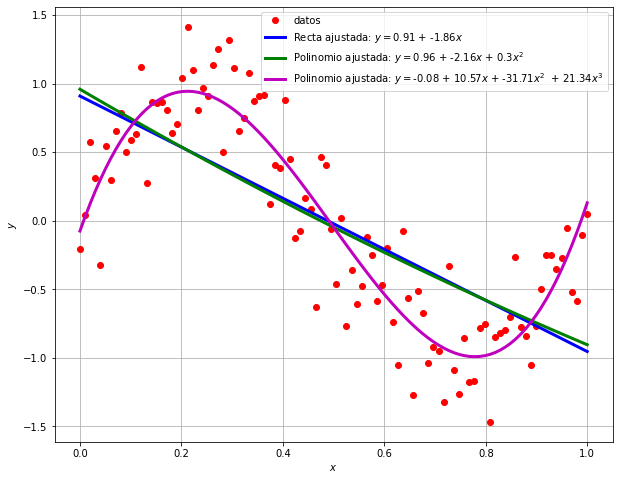

In [76]:
# Graficar recta, parabola y cubica
# Graficar recta y parabola ajustadas
plt.figure(figsize=(10,8))
plt.plot(x,y,'or',label='datos')

#Modelo lineal
f_hat_1 = beta1[0] + beta1[1]*x
#Modelo polinomial grado 2
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
#Modelo polinomial cúbico
f_hat_3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3

plt.plot(x,f_hat_1, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta1[0],2)} + {np.round(beta1[1],2)}$x$')
plt.plot(x,f_hat_2, 'g', lw=3, label=f'Polinomio ajustada: $y=${np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$ + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x,f_hat_3, 'm', lw=3, label=f'Polinomio ajustada: $y=${np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$ + {np.round(beta_3[2],2)}$x^2$  + {np.round(beta_3[3],2)}$x^3$')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 7...

In [77]:
# Definimos funcion objetivo y semilla
def min_sqe_7(beta,x_points,y_points):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(8)]).sum(axis=0)
    
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe
    

In [78]:
# Resolvemos
beta_ini_7 = np.zeros(8)
sol7 = opt.minimize(fun=min_sqe_7, x0=beta_ini_7, args=(x,y))
sol7

      fun: 0.04046769115934258
 hess_inv: array([[   14.11595006,  -106.67986992,   182.43586958,    13.66747587,
          -96.98515654,   -94.28050067,   -14.67205991,   104.57444682],
       [ -106.67986992,  1156.36669603, -2378.12644553,   -17.29533   ,
         1429.20049552,  1303.13334081,   132.77922854, -1565.21468968],
       [  182.43586958, -2378.12644553,  5506.33903663,  -244.89565495,
        -3607.42230985, -3147.495078  ,  -184.78528222,  4024.70422421],
       [   13.66747587,   -17.29533   ,  -244.89565495,   157.88169414,
          314.00590067,   203.81713383,   -64.30879094,  -402.23089536],
       [  -96.98515654,  1429.20049552, -3607.42230985,   314.00590067,
         2526.31759272,  2129.59986736,    44.86820002, -2871.9226234 ],
       [  -94.28050067,  1303.13334081, -3147.495078  ,   203.81713383,
         2129.59986736,  1828.9438695 ,    75.32636197, -2396.23926583],
       [  -14.67205991,   132.77922854,  -184.78528222,   -64.30879094,
           44.86

**De nuevo, veamos $\beta$**

In [79]:
# Mostrar coeficientes
beta_7 = sol7.x
beta_7

array([ -0.06535465,   9.47108184, -21.86098774,  -2.17223396,
        10.87153426,  11.13536398,   2.70950063, -10.22913619])

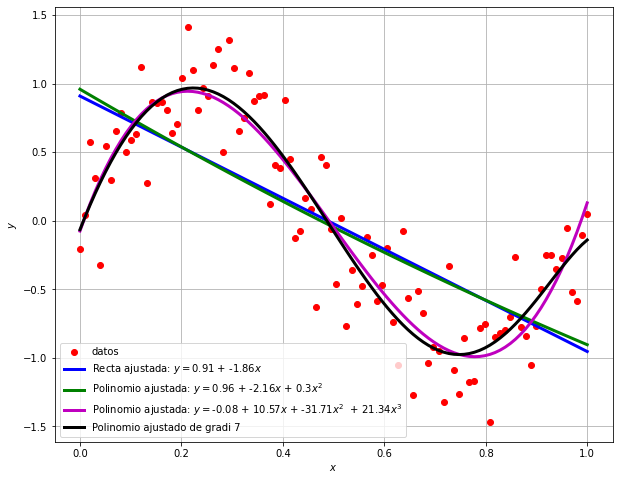

In [80]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(10,8))
plt.plot(x,y,'or',label='datos')

#Modelo lineal
f_hat_1 = beta1[0] + beta1[1]*x
#Modelo polinomial grado 2
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
#Modelo polinomial cúbico
f_hat_3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3
#Modelo polinomial grado 7
f_hat_7 = np.array([beta_7[i]*x**i for i in range(8)]).sum(axis=0)


plt.plot(x,f_hat_1, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta1[0],2)} + {np.round(beta1[1],2)}$x$')
plt.plot(x,f_hat_2, 'g', lw=3, label=f'Polinomio ajustada: $y=${np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$ + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x,f_hat_3, 'm', lw=3, label=f'Polinomio ajustada: $y=${np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$ + {np.round(beta_3[2],2)}$x^2$  + {np.round(beta_3[3],2)}$x^3$')

plt.plot(x,f_hat_7, 'k', lw=3, label=f'Polinomio ajustado de gradi 7')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

In [81]:
# Definimos funcion objetivo y semilla
def min_sqe_N(beta,x_points,y_points, N):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe
  

In [83]:
beta_ini_10 = np.zeros(11)
sol10 = opt.minimize(fun=min_sqe_N, x0=beta_ini_10, args=(x,y,10))
sol10

      fun: 0.04040700283704769
 hess_inv: array([[ 1.87649598e+01, -2.01911260e+02,  5.41811187e+02,
        -2.38195280e+02, -3.72062379e+02, -1.16711757e+02,
         1.59013310e+02,  2.85133880e+02,  2.27636364e+02,
         1.20935539e+01, -3.19285525e+02],
       [-2.01911260e+02,  3.06949177e+03, -9.60779075e+03,
         5.01512350e+03,  7.08258058e+03,  1.90854383e+03,
        -3.43276553e+03, -5.75029183e+03, -4.45423691e+03,
        -7.93313866e+01,  6.53623822e+03],
       [ 5.41811187e+02, -9.60779075e+03,  3.28755567e+04,
        -1.91530134e+04, -2.53709008e+04, -5.94179229e+03,
         1.35069995e+04,  2.15890416e+04,  1.63299723e+04,
        -2.15044248e+02, -2.49313366e+04],
       [-2.38195280e+02,  5.01512350e+03, -1.91530134e+04,
         1.28286427e+04,  1.56649872e+04,  2.83123046e+03,
        -9.50029228e+03, -1.42922266e+04, -1.04402142e+04,
         6.53962328e+02,  1.69542559e+04],
       [-3.72062379e+02,  7.08258058e+03, -2.53709008e+04,
         1.56649872

In [84]:
beta10 = sol10.x
beta10

array([ -0.09146111,  10.09954514, -24.88821165,   1.82828253,
        11.75661536,   8.01947903,   0.92344848,  -3.9816942 ,
        -4.9842959 ,  -2.23626821,   3.46126993])

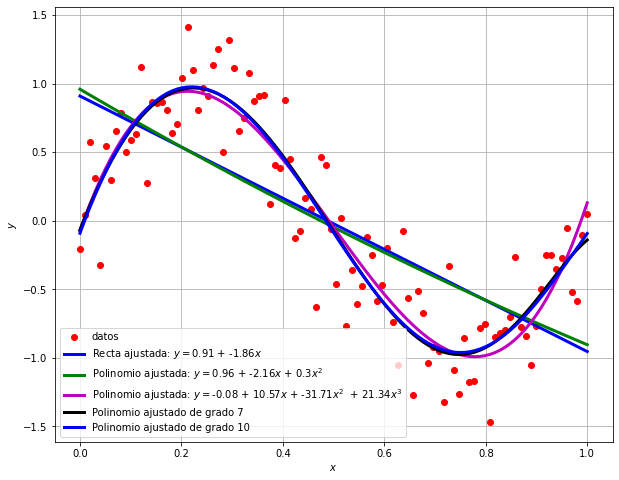

In [88]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(10,8))
plt.plot(x,y,'or',label='datos')

#Modelo lineal
f_hat_1 = beta1[0] + beta1[1]*x
#Modelo polinomial grado 2
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
#Modelo polinomial cúbico
f_hat_3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3
#Modelo polinomial grado 7
f_hat_7 = np.array([beta_7[i]*x**i for i in range(8)]).sum(axis=0)
#Modelo grado 10
f_hat_10 = np.array([beta10[i]*x**i for i in range(11)]).sum(axis=0)

plt.plot(x,f_hat_1, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta1[0],2)} + {np.round(beta1[1],2)}$x$')
plt.plot(x,f_hat_2, 'g', lw=3, label=f'Polinomio ajustada: $y=${np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$ + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x,f_hat_3, 'm', lw=3, label=f'Polinomio ajustada: $y=${np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$ + {np.round(beta_3[2],2)}$x^2$  + {np.round(beta_3[3],2)}$x^3$')

plt.plot(x,f_hat_7, 'k', lw=3, label=f'Polinomio ajustado de grado 7')
plt.plot(x,f_hat_10, 'b', lw=3, label=f'Polinomio ajustado de grado 10')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

In [82]:
# Mostrar coeficientes
beta1

array([ 0.90987873, -1.86395606])

In [89]:
beta_2

array([ 0.9594886 , -2.16467226,  0.30071638])

In [90]:
beta_3


array([ -0.07529417,  10.57388438, -31.70627192,  21.33800833])

In [91]:
beta_7

array([ -0.06535465,   9.47108184, -21.86098774,  -2.17223396,
        10.87153426,  11.13536398,   2.70950063, -10.22913619])

In [92]:
beta10

array([ -0.09146111,  10.09954514, -24.88821165,   1.82828253,
        11.75661536,   8.01947903,   0.92344848,  -3.9816942 ,
        -4.9842959 ,  -2.23626821,   3.46126993])

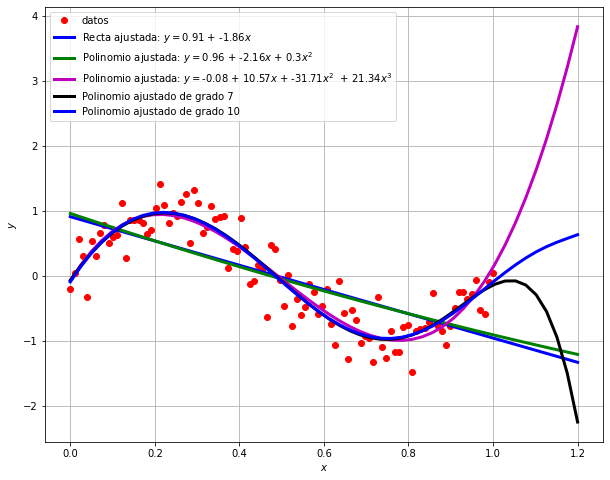

In [93]:
# Grafica de ajustes
# Grafica de los puntos y la recta ajustada

plt.figure(figsize=(10,8))
plt.plot(x,y,'or',label='datos')
x = np.linspace(0,1.2)
#Modelo lineal
f_hat_1 = beta1[0] + beta1[1]*x
#Modelo polinomial grado 2
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
#Modelo polinomial cúbico
f_hat_3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3
#Modelo polinomial grado 7
f_hat_7 = np.array([beta_7[i]*x**i for i in range(8)]).sum(axis=0)
#Modelo grado 10
f_hat_10 = np.array([beta10[i]*x**i for i in range(11)]).sum(axis=0)

plt.plot(x,f_hat_1, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta1[0],2)} + {np.round(beta1[1],2)}$x$')
plt.plot(x,f_hat_2, 'g', lw=3, label=f'Polinomio ajustada: $y=${np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$ + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x,f_hat_3, 'm', lw=3, label=f'Polinomio ajustada: $y=${np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$ + {np.round(beta_3[2],2)}$x^2$  + {np.round(beta_3[3],2)}$x^3$')

plt.plot(x,f_hat_7, 'k', lw=3, label=f'Polinomio ajustado de grado 7')
plt.plot(x,f_hat_10, 'b', lw=3, label=f'Polinomio ajustado de grado 10')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

In [94]:
# Función objetivo ajuste polinomio grado N
# Generamos 100 puntos ruidosos a partir de una senoidal
N=100
x = np.linspace(0,1,N)
y = np.sin(2*np.pi*x) + np.random.normal(loc=0,scale=0.3,size=(N,))


In [95]:
# Error cuadratico
error = []
for i in range(1,10):
    beta_ini = np.zeros(i+1)
    sol = opt.minimize(fun= min_sqe_N, x0=beta_ini, args=(x,y,i))
    error.append(sol.fun)
    

In [96]:
error

[0.14108213738832612,
 0.14100835975814463,
 0.05486897726913439,
 0.054550478393604884,
 0.04853395868775962,
 0.04766083831106836,
 0.047314215372612135,
 0.04732101169598552,
 0.047507155624714276]

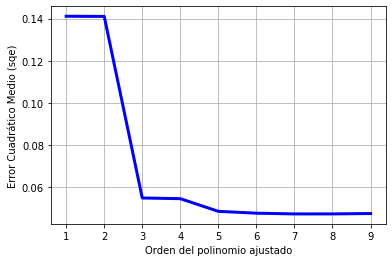

In [99]:
#Plotear la lista de los errores de los ajustes de curvas
plt.figure(figsize=(6,4))
plt.plot(range(1,10),error, 'b',lw=3)
plt.xlabel('Orden del polinomio ajustado')
plt.ylabel('Error Cuadrático Medio (sqe)')
plt.grid()

En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [100]:
def min_sqe_N_ridge(beta, x_points,y_points, N, l):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe_ridge = (1/(2*n))*((y_points-f_hat)**2).sum() + l*np.linalg.norm(beta)**2
    return sqe_ridge

In [102]:
beta_r_ini = np.zeros(8)
beta_r_ini

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [117]:
sol_r7 = opt.minimize(fun= min_sqe_N_ridge, x0=beta_r_ini, args=(x,y,7,0.00003))
sol_r7

      fun: 0.0631580930152651
 hess_inv: array([[   11.18207947,   -71.06210186,   102.12222335,    21.30108617,
          -47.9798357 ,   -56.80617904,   -15.42260989,    57.20232547],
       [  -71.06210186,   737.78464139, -1563.71366045,   259.64640524,
          837.99327346,   492.13451473,  -102.10692555,  -609.14066888],
       [  102.12222335, -1563.71366045,  4678.37856504, -2648.85950811,
        -2525.49555512,   153.43571111,  1493.97951263,   383.79285392],
       [   21.30108617,   259.64640524, -2648.85950811,  4327.8680252 ,
         1012.11891399, -3117.71255881, -2742.62539946,  2868.4666527 ],
       [  -47.9798357 ,   837.99327346, -2525.49555512,  1012.11891399,
         1618.95195373,   607.90197772,  -498.02839251, -1084.80832148],
       [  -56.80617904,   492.13451473,   153.43571111, -3117.71255881,
          607.90197772,  3561.49171037,  2119.15835336, -3824.19135132],
       [  -15.42260989,  -102.10692555,  1493.97951263, -2742.62539946,
         -498.028

In [118]:
beta_r7 = sol_r7.x
beta_r7

array([  0.36746504,   4.89848075, -10.8101486 ,  -3.96289195,
         3.55224629,   5.89728818,   3.19069958,  -3.02811066])

In [119]:
beta_7

array([ -0.06535465,   9.47108184, -21.86098774,  -2.17223396,
        10.87153426,  11.13536398,   2.70950063, -10.22913619])

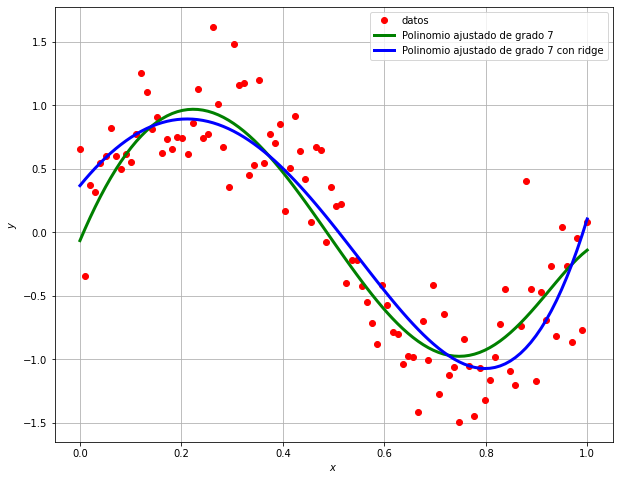

In [120]:
# Grafica de los puntos y la recta ajustada
# Mostrar coeficientes
# Graficar recta y parabola ajustadas
plt.figure(figsize=(10,8))
plt.plot(x,y,'or',label='datos')


#Modelo polinomial grado 7
f_hat_7 = np.array([beta_7[i]*x**i for i in range(8)]).sum(axis=0)
#Modelo polinomial grado 7 con regularización (ridge)
f_hat_7_r = np.array([beta_r7[i]*x**i for i in range(8)]).sum(axis=0)

plt.plot(x,f_hat_7, 'g', lw=3, label=f'Polinomio ajustado de grado 7')
plt.plot(x,f_hat_7_r, 'b', lw=3, label=f'Polinomio ajustado de grado 7 con ridge')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [121]:
def norma_1(vec):
    return sum(abs(vec))

v = np.array([-1,2,-3,4])
norma_1(v)

10

In [122]:
def min_sqe_N_lasso(beta, x_points,y_points, N, l):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe_lasso = (1/(2*n))*((y_points-f_hat)**2).sum() + l*norma_1(beta)
    return sqe_lasso

In [123]:
beta_l_ini = np.zeros(8)
beta_l_ini

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [125]:
sol_l7 = opt.minimize(fun=min_sqe_N_lasso, x0=beta_l_ini, args=(x,y,7,0.00003))
sol_l7

      fun: 0.05102649196461145
 hess_inv: array([[ 8.06265124e+00, -3.22526745e+01, -1.68037645e-01,
         7.79842463e+01,  3.19232605e-01, -8.95640144e+01,
        -3.16081395e+00,  3.89305353e+01],
       [-3.22526745e+01,  2.04371448e+02,  2.03131392e+00,
        -7.81558675e+02, -4.19341403e+00,  1.20239746e+03,
         2.52924364e+01, -6.26413730e+02],
       [-1.68037645e-01,  2.03131392e+00,  8.63547894e-02,
        -1.43929828e+01, -1.00553120e-01,  2.95155221e+01,
         7.27171025e-01, -1.82350298e+01],
       [ 7.79842463e+01, -7.81558675e+02, -1.43929828e+01,
         4.69570503e+03,  3.08526028e+01, -9.04755996e+03,
        -1.20391618e+02,  5.29813926e+03],
       [ 3.19232605e-01, -4.19341403e+00, -1.00553120e-01,
         3.08526028e+01,  2.35493293e-01, -6.48333534e+01,
        -6.85464781e-01,  3.96075991e+01],
       [-8.95640144e+01,  1.20239746e+03,  2.95155221e+01,
        -9.04755996e+03, -6.48333534e+01,  1.92826260e+04,
         1.92855170e+02, -1.1894107

In [126]:
beta_l7 = sol_l7.x
beta_l7

array([ 2.47536121e-01,  4.67244746e+00,  6.43648886e-02, -3.05585242e+01,
       -1.64909091e-01,  4.50211980e+01, -4.04587492e-10, -1.95236034e+01])

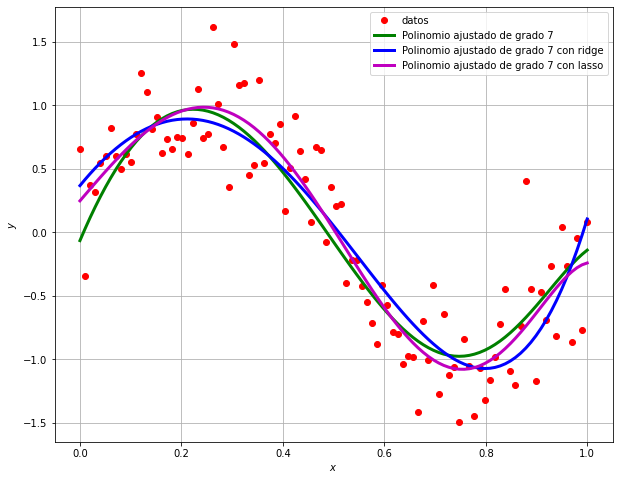

In [127]:
# Graficar los modelos obtenidos de grado 7 (con regularización: lasso, ridge)
# Graficar recta y parabola ajustadas
plt.figure(figsize=(10,8))
plt.plot(x,y,'or',label='datos')


#Modelo polinomial grado 7
f_hat_7 = np.array([beta_7[i]*x**i for i in range(8)]).sum(axis=0)
#Modelo polinomial grado 7 con regularización (ridge)
f_hat_7_r = np.array([beta_r7[i]*x**i for i in range(8)]).sum(axis=0)
#Modelo polinomio de grado 7 con regularización (lasso)
f_hat_7_l = np.array([beta_l7[i]*x**i for i in range(8)]).sum(axis=0)

plt.plot(x,f_hat_7, 'g', lw=3, label=f'Polinomio ajustado de grado 7')
plt.plot(x,f_hat_7_r, 'b', lw=3, label=f'Polinomio ajustado de grado 7 con ridge')
plt.plot(x,f_hat_7_l, 'm', lw=3, label=f'Polinomio ajustado de grado 7 con lasso')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()



## 4. Ajuste robusto

Ahora, consideremos de nuevo el caso de la línea recta con un par de puntos atípicos al inicio y al final...

In [128]:
N=20
x = np.linspace(0,10,N)
y = 10 + 2*x + np.random.normal(loc=0,scale=2, size=(N,))


In [130]:
y[0]=30
y[-1] = 10

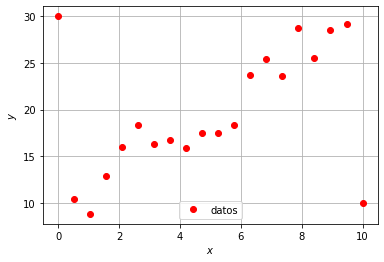

In [131]:
plt.figure(figsize=(6,4))
plt.plot(x,y,'or',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()


Solucionamos el problema normalmente...

In [132]:
sol = opt.minimize(fun=min_sqe_N, x0=[0,0], args=(x,y,1))
sol

      fun: 16.998788737411257
 hess_inv: array([[ 3.62546874, -0.52921483],
       [-0.52921483,  0.10647602]])
      jac: array([ 5.48362732e-06, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([14.72224575,  0.98990711])

In [133]:
beta = sol.x
beta

array([14.72224575,  0.98990711])

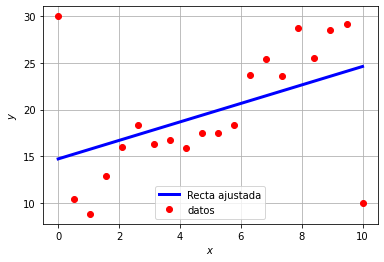

In [134]:
plt.figure(figsize=(6,4))
f_hat = beta[0] + beta[1]*x
plt.plot(x,f_hat,'b',lw=3, label='Recta ajustada')
plt.plot(x,y,'or',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()


Si estos puntos que parecen ser atípicos, hacen parte de una 'mala medición', vemos que el ajuste que obtenemos a los otros puntos es muy pobre...

**¿Cómo podemos evitar esto?** La respuesta es [*ajuste robusto*](https://en.wikipedia.org/wiki/Huber_loss).

In [135]:
def huber(a,d):
    if np.abs(a) <= d:
        return a**2
    else:
        return d*(2*np.abs(a) - d)
    

In [136]:
def min_sq_rob(beta,x_points,y_points):
    n=len(x_points)
    recta = beta[0] + beta[1]*x_points
    return (1/(2*n))*(np.vectorize(huber)(y_points - recta,5)).sum()

In [142]:
sol = opt.minimize(fun=min_sq_rob, x0=[0,0], args=(x,y))
sol

      fun: 10.199124789335224
 hess_inv: array([[ 4.90488   , -0.75781923],
       [-0.75781923,  0.15138954]])
      jac: array([ 3.57627869e-07, -4.41074371e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([10.97906197,  1.731249  ])

In [143]:
beta = sol.x
beta

array([10.97906197,  1.731249  ])

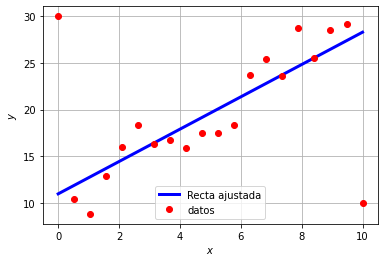

In [144]:
plt.figure(figsize=(6,4))
f_hat = beta[0] + beta[1]*x
plt.plot(x,f_hat,'b',lw=3, label='Recta ajustada')
plt.plot(x,y,'or',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Mejor...

## 5. Actividad

La siguiente celda lee datos correspondientes a tamaños $x$ ($ft^2$) y precios $y$ (USD) de casas en Portland, Oregon.

1. Graficar estos datos poniendo los precios en el eje $y$ y los tamaños en el eje $x$.
2. Ajustar polinomios de grado 1 hasta grado 5.
3. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado sea el menor posible.
4. Supongamos que un amigo tuyo tiene una casa de $1250 ft^2$. Según tu modelo, ¿en cuánto podría vender dicha casa?


In [147]:
import pandas as pd
data = pd.read_csv('housing_prices.csv')


In [148]:
data.head()

,size,n_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [149]:
x = data['size'].values
y = data['price'].values

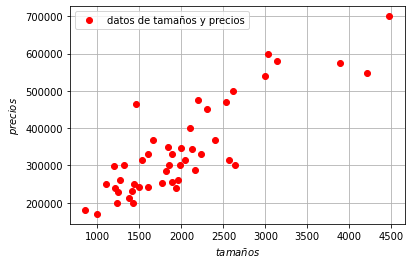

In [150]:
plt.figure(figsize=(6,4))
plt.plot(x,y,'or',label='datos de tamaños y precios')
plt.xlabel('$tamaños$')
plt.ylabel('$precios$')
plt.legend(loc='best')
plt.grid()


# Avisos:

## Proyecto:
### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Algún integrante del equipo me deberá mandar un mensaje por MSTeams con los nombres de los integrantes.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Tendrán que mandarme un mensaje con su tema de proyecto. Juntos, definiremos el alcance.
### 4. Fecha de entrega y presentación: 22 de Junio 2023 (jueves)

### Jueves 15 de junio 2023 Examen Módulo 1